Credentials

In [101]:
# Name     : Siddhant Joshi
# Roll No. : 200107081
# Course   : CL653

Importing the required Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Reading the dataset directly from the github repository

In [103]:
# The file can be downloaded from the following link
# https://www.kaggle.com/code/raviteja11padala/analysis-of-industrial-scale-penicillin-simulation/input
#siddhant_df=pd.read_csv("/content/100_Batches_IndPenSim_Statistics.csv")

url = 'https://raw.githubusercontent.com/SiddhantJoshi2703/cl653-project-file/main/100_Batches_IndPenSim_Statistics.csv'
siddhant_df = pd.read_csv(url, index_col=0)
siddhant_df

,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
Batch ref,,,,
1,1070000.0,1720000.0,2790000.0,0
2,986000.0,1340000.0,2330000.0,0
3,1420000.0,1260000.0,2680000.0,0
4,816000.0,1070000.0,1890000.0,0
5,2090000.0,2360000.0,4450000.0,1
...,...,...,...,...
96,1280000.0,1640000.0,2920000.0,0
97,1440000.0,2450000.0,3890000.0,1
98,944000.0,1230000.0,2180000.0,0


In [104]:
siddhant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Penicllin_harvested_during_batch(kg)   100 non-null    float64
 1   Penicllin_harvested_end_of_batch (kg)  100 non-null    float64
 2   Penicllin_yield_total (kg)             100 non-null    float64
 3   Fault ref(0-NoFault 1-Fault)           100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.9 KB


Making a copy of dataframe for further analysis

In [105]:
siddhant_df1=siddhant_df
siddhant_df1

,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
Batch ref,,,,
1,1070000.0,1720000.0,2790000.0,0
2,986000.0,1340000.0,2330000.0,0
3,1420000.0,1260000.0,2680000.0,0
4,816000.0,1070000.0,1890000.0,0
5,2090000.0,2360000.0,4450000.0,1
...,...,...,...,...
96,1280000.0,1640000.0,2920000.0,0
97,1440000.0,2450000.0,3890000.0,1
98,944000.0,1230000.0,2180000.0,0


Plotting correlation matrix for data redundancy

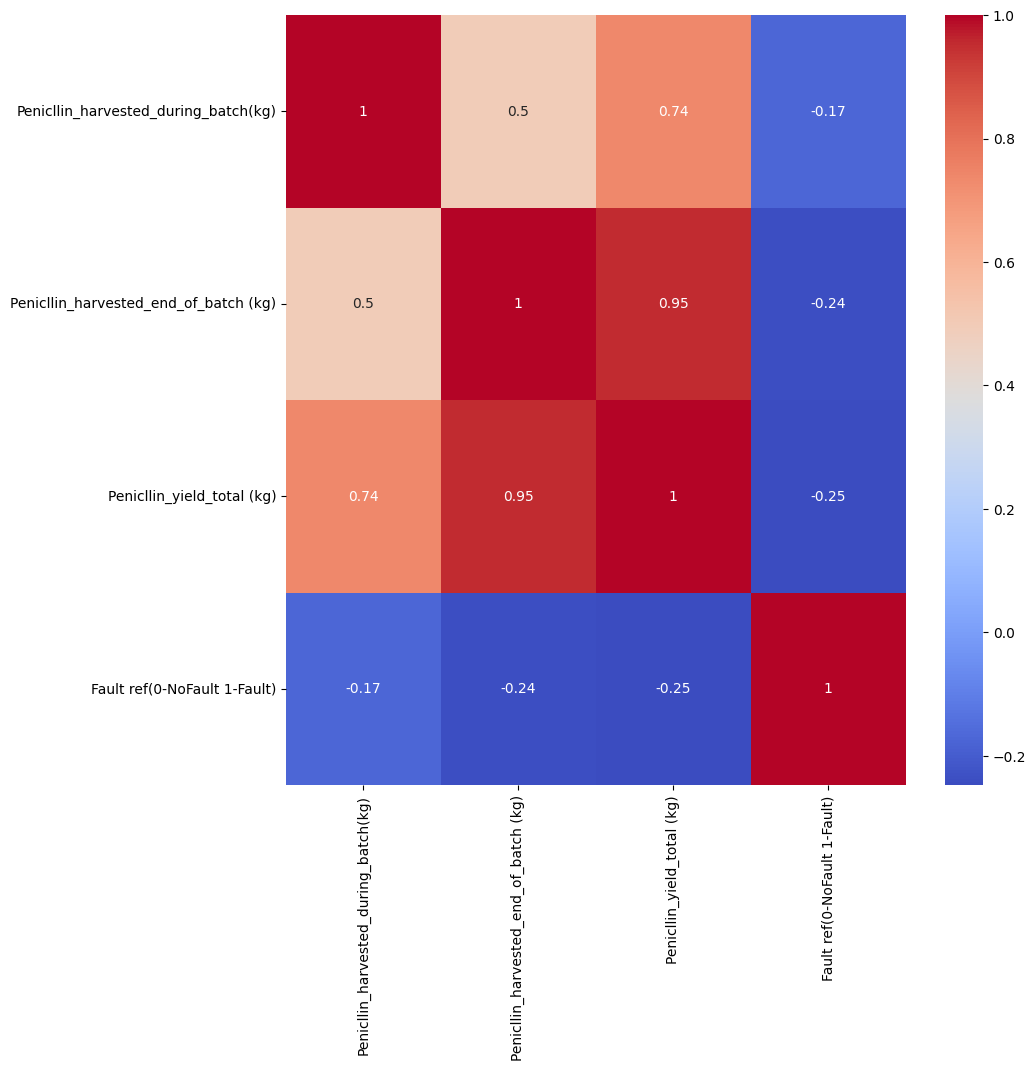

In [106]:
# Plot the correlation matrix using a heat map.
correlation = siddhant_df1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Scatter plots for relation between target and variables

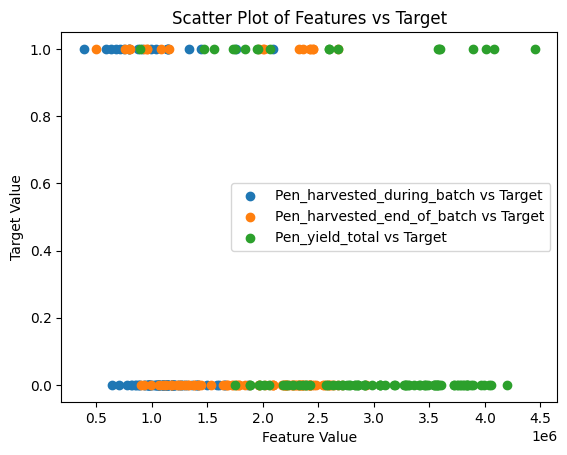

In [107]:
plt.scatter(siddhant_df1['Penicllin_harvested_during_batch(kg)'], siddhant_df1['Fault ref(0-NoFault 1-Fault)'], label='Pen_harvested_during_batch vs Target')
plt.scatter(siddhant_df1['Penicllin_harvested_end_of_batch (kg)'], siddhant_df1['Fault ref(0-NoFault 1-Fault)'], label='Pen_harvested_end_of_batch vs Target')
plt.scatter(siddhant_df1['Penicllin_yield_total (kg)'], siddhant_df1['Fault ref(0-NoFault 1-Fault)'], label='Pen_yield_total vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Scatter Plot of Features vs Target')
plt.legend()
plt.show()

Splitting the dataset into Training and Testing data

In [136]:
# ************** Splitting features and target variable
X = siddhant_df1.drop(columns=['Fault ref(0-NoFault 1-Fault)'])
y = siddhant_df1['Fault ref(0-NoFault 1-Fault)']  # Target variable

# ************** Split the data into training and testing sets
# ************** Setting random state to last two digits of roll no. i.e. 81
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

scaler=StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)

Applying PCA

In [137]:
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(scaled_X_train)
X_test_pca=pca.fit_transform(scaled_X_test)
X_test_pca

array([[ 1.96340183e-01, -5.30877954e-01,  6.27428746e-03],
       [-8.48656652e-01, -4.65658778e-01,  2.07082276e-03],
       [ 1.29792582e+00,  2.82945412e-01, -2.08825979e-03],
       [-1.11534255e+00, -4.35044150e-01,  1.97732814e-03],
       [ 3.02821283e+00,  2.60133842e-01, -6.22216166e-03],
       [ 4.51082640e-01,  8.80695587e-02, -2.27768134e-04],
       [ 2.48625250e+00, -3.31465515e-01,  2.01235238e-04],
       [-5.43409928e-01, -3.63413019e-01, -8.48909803e-03],
       [-2.79902854e+00,  1.61728264e+00,  4.23191801e-03],
       [ 1.20361218e+00,  3.81266081e-01, -1.45124324e-03],
       [-1.95669401e+00, -4.22811957e-01,  2.01287787e-03],
       [-1.07470360e+00, -4.57067796e-01, -8.06942309e-03],
       [-1.71861305e+00, -5.76670949e-01,  2.59210971e-03],
       [ 2.65670016e+00,  2.55556700e-01, -8.99586212e-05],
       [ 2.51723048e-01,  2.12665866e-01,  9.43282853e-03],
       [-1.12480415e+00, -1.80901765e-01,  9.82480043e-04],
       [ 5.71736741e-01,  1.16394918e-01

Defining Logistic Regression

In [138]:
logistic_model = LogisticRegression()
#logistic_model.fit(scaled_X_train, y_train)

Defining KNN classifier

In [139]:
knn = KNeighborsClassifier()
#clf.fit(X_train_pca, y_train)


**Function for calling models**

In [140]:
def classification_report_model(X, y, model, X_test, y_test):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Class 0', 'Class 1']
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


**Calling Function for Logistic Model**

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


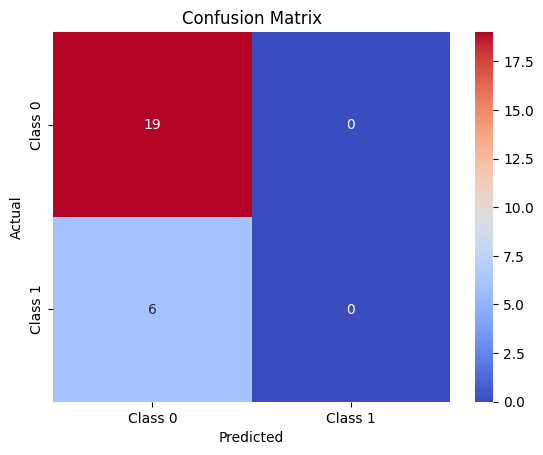

In [141]:
classification_report_model(X_train_pca, y_train,logistic_model, X_test_pca, y_test)

**Calling Function for KNN Model**

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25

Confusion Matrix:


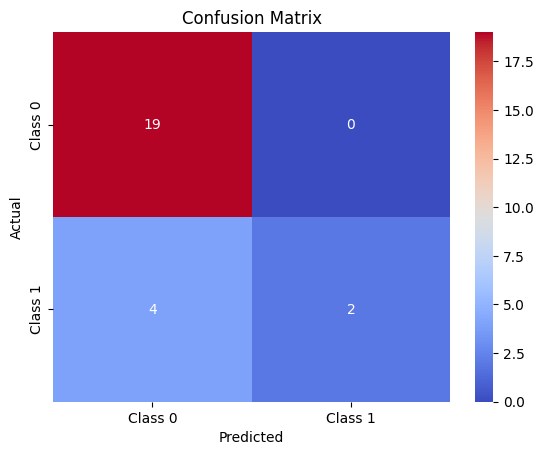

In [142]:
classification_report_model(X_train_pca, y_train, knn, X_test_pca, y_test)

**ROC Plot before Hyperparameter Tuning**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


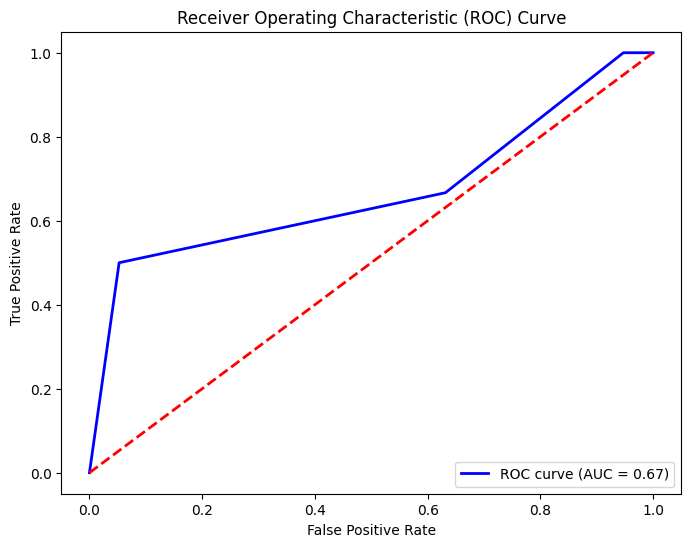

In [151]:
y_probs = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Hyperparameter Tuning**

In [152]:
# Going to use kneighbour for further analysis and hyperparameter tuning

In [177]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11]}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

best_params= grid_search.best_params_
print("Best Hyperparameters:", best_params)

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'n_neighbors': 2}
Accuracy on test set: 0.8


**ROC PLOT after Hyperparameter Tuning**

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

Confusion Matrix:


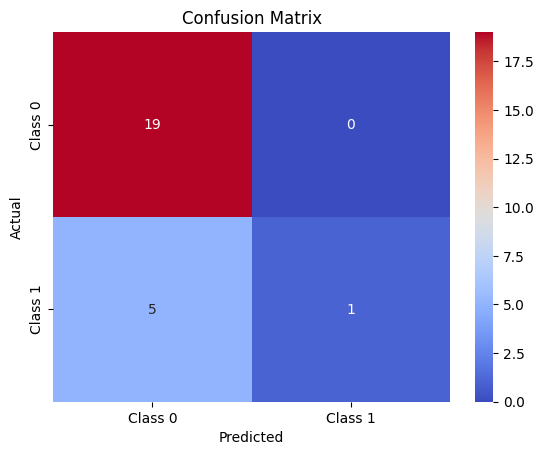

In [178]:
classification_report_model(X_train_pca, y_train, final_model, X_test_pca, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


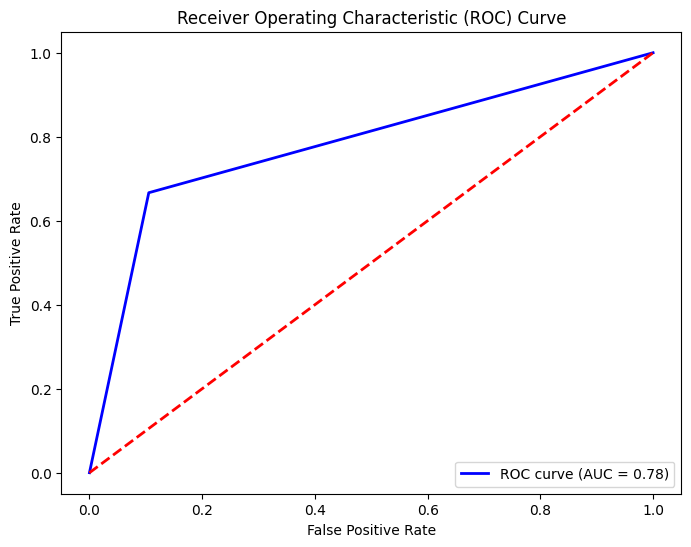

In [179]:
y_probs = final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()